## EE-361M Introduction to Data Mining
## Assignment #3
## Due: Thursday, Mar 4, 2016 by midnight; Total points: 50


Your homework should be written in a **Jupyter notebook** (if this isn't possible, let me know). Please use this naming format for your notebook you submit: **Group(Group Num)_HW(HW Number).ipynb**. For example, Group1_HW1.ipynb. Homeworks should be submitted through Canvas in your **groups of 3 from the first homework**. If groups need to be adjusted please contact the TA. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

## Question 1 (2+1 = 3 points)

View the video at:

https://www.youtube.com/watch?v=jbkSRLYSojo

(Hans Rosling's 200 Countries, 200 Years, 4 Minutes) and answer the following questions:

1. How many variables are being visualized in the “moving bubble plots” video (list them)?

2. Identify a variable that is “zoomed into”, i.e., examined at a sub-category or more detailed level.


FACTOID: Rosling’s gapminder visualization

(see https://www.youtube.com/user/Gapcast for some more insightful videos) can now be

readily used by you via Google Charts: https://developers.google.com/chart/interactive/docs/gallery

Just plug in your own variables into “Bubble Chart” under the URL above and go!

## ANSWER
## 1
5 variables - time, lifespan, income, population, geographical area (the color)
## 2
An individual country

## Question 2 (3+3+2+2=10 points)

In this question, you will explore the application of Lasso and Ridge regression using sklearn package in Python. The dataset is prostate cancer data. The data can be found on canvas on the homework 3 page as prostate.csv. More information on the data can be found [here](https://cran.r-project.org/web/packages/ElemStatLearn/ElemStatLearn.pdf) under prostate. Use a random state of 42 and a test size of 1/3 to [split the data into training and test](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). We will be using all the variables to predict lcavol. Note: lambda is called alpha in sklearn.

1. Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, use [0.00001, 0.0001,0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 10, 100]  for ridge and [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5] for lasso. Report the best chosen based on cross-validation. The cross validation should happen on your training data using  average MSE as the scoring metric.
2. Run ridge and lasso for all of the parameters specified above (on all training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? 
3. Run least squares regression, ridge, and lasso on the full training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error on the test data for each.
4. For the best lasso parameter, determine the variables that were not dropped. Using only these variables, run least squares regression on full training data and report the prediction error on the test data.


## ANSWER
# 1

In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np
%matplotlib inline

data = pd.read_csv("prostate.csv")
data.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


In [2]:
X = data[data.columns[1:]].values
y = data.lcavol.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n_folds = 5
k_fold = cross_validation.KFold(len(X_train), n_folds)
lasso_alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
lasso_avg_rmse = {}

for alpha in lasso_alphas:
    lasso = linear_model.Lasso(alpha=alpha)
    avg_mse = 0
    for k, (train, test) in enumerate(k_fold):
        lasso.fit(X_train[train], y_train[train])
        avg_mse = avg_mse + mean_squared_error(y_train[test], lasso.predict(X_train[test])) 
    lasso_avg_rmse[alpha] = avg_mse / n_folds
best_alpha_lasso = min(lasso_avg_rmse, key=lasso_avg_rmse.get)
print("Best lasso alpha: {}".format(best_alpha_lasso))

Best lasso alpha: 0.1


In [3]:
ridge_alphas =  [0.00001, 0.0001,0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 10, 100] 
ridge_avg_rmse = {}

for alpha in ridge_alphas:
    ridge = linear_model.Ridge(alpha=alpha)
    avg_mse = 0
    for k, (train, test) in enumerate(k_fold):
        ridge.fit(X_train[train], y_train[train])
        avg_mse = avg_mse + mean_squared_error(y_train[test], ridge.predict(X_train[test])) 
    ridge_avg_rmse[alpha] = avg_mse / n_folds
best_alpha_ridge = min(ridge_avg_rmse, key=ridge_avg_rmse.get)
print("Best ridge alpha: {}".format(best_alpha_ridge))

Best ridge alpha: 10


## 2

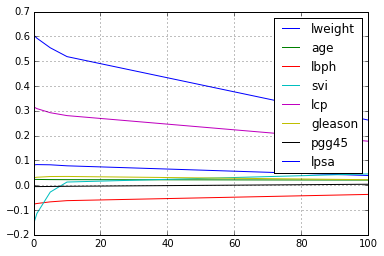

In [4]:
ridge_coeff = {}
for alpha in ridge_alphas:
    ridge = linear_model.Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_coeff[alpha] = ridge.coef_
rpd = pd.DataFrame.from_dict(ridge_coeff, orient='index')
rpd.columns = data.columns[1:]
rpd = rpd.sort_index()
rpd.plot()

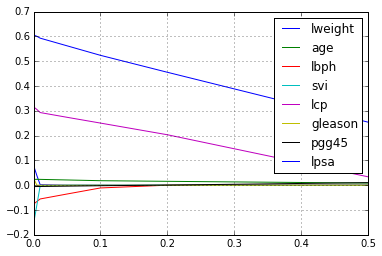

In [5]:
lasso_coeff = {}
for alpha in lasso_alphas:
    lasso = linear_model.Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_coeff[alpha] = lasso.coef_
lpd = pd.DataFrame.from_dict(lasso_coeff, orient='index', )
lpd.columns = data.columns[1:]
lpd=lpd.sort_index()
lpd.plot()

## 3

In [6]:
linear_clf = linear_model.LinearRegression()
ridge_clf = linear_model.Ridge(alpha=best_alpha_ridge)
lasso_clf = linear_model.Lasso(alpha=best_alpha_lasso)

def fit_reg(model, name):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(pred, y_test)
    print("MSE for {0}: {1}".format(name, mse))

fit_reg(linear_clf, "linear")
fit_reg(ridge_clf, "ridge")
fit_reg(lasso_clf, "lasso")

MSE for linear: 0.543783938173
MSE for ridge: 0.544994235195
MSE for lasso: 0.564961986751


## 4

In [7]:
lasso_coef_non_zero = np.array([1 if val != 0 else 0 for (var, val) in zip(data.columns, lasso_clf.coef_)], 
                               dtype=bool)
X_train_nonzero = X_train[:,lasso_coef_non_zero]
X_test_nonzero = X_test[:, lasso_coef_non_zero]
linear_clf.fit(X_train_nonzero, y_train)
pred_y = linear_clf.predict(X_test_nonzero)
print ("Linear w/ only non-zeros MSE: {}".format(mean_squared_error(pred_y, y_test)))

Linear w/ only non-zeros MSE: 0.541808479085


## Question 3 (3+3+2+2 = 10 points)

Re-solve all the questions in question 2 using R. You can submit the code and results via a PDF or other format. Just please make a reference to it in your notebook. See hints.R on the Canvas homework 3 page to help get you started. I would recommend using [RStudio](https://www.rstudio.com/products/rstudio/download/) for your work in R.

## ANSWER

See Homework_3_R_Solution.R on Canvas

## Question 4 (5+5 = 10 points)

1. Derive the coefficent updates, from first principles, for a gradient descent version of linear regression. Hint: start from the cost function. If you write the math by hand, submit that as a separate file and make a reference to it in your notebook or include the image in your notebook.
2. Write Python code for a gradient descent version of linear regression. Should be similar to sklearn in that you have a fit function that takes an X, y, learning rate, and number of iterations and a predict funtion that takes an X value. Use your new SGD regression to re-run question 2.4 and compare MSE. Make sure you always normalize your X matrices and use an intercept. You can also compare your results with SGDRegressor from sklearn, but not required.

## ANSWER
## 1
See here: http://cs229.stanford.edu/notes/cs229-notes1.pdf

## 2

In [8]:
import random

class LinearRegression_SGD:
    
    def __init__(self, learning_rate, n_iter):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        
    
    def fit(self, X, y):
        # normalize
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
        # add intercept
        X = np.c_[np.ones(X.shape[0]), X]
        #init coef
        self.coef = np.zeros(X.shape[1])
        for _ in range(self.n_iter):
            pred_y = self.predict(X, add_intercept=False, normalize=False).flatten()
            residuals = y - pred_y
            self.coef = self.coef + self.learning_rate * (residuals.T.dot(X))
         
        
    def predict(self, X, add_intercept=True, normalize=True):
        # normalize
        if normalize:
            X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
        # add intercept
        if add_intercept:
            X = np.c_[np.ones(X.shape[0]), X]
        return X.dot(self.coef)

In [9]:
lr_sgd = LinearRegression_SGD(.01, 1000)
lr_sgd.fit(X_train_nonzero, y_train)
y_pred = lr_sgd.predict(X_test_nonzero)
print ("SGD w/ only non-zeros MSE: {}".format(mean_squared_error(y_pred, y_test)))

SGD w/ only non-zeros MSE: 0.59189566377


## Question 5 (2+1+5+2 = 10 points)

We will use Google's Tensorflow to create a simple multi-layered perceptron. Installation instructions can be found [here](https://www.tensorflow.org/versions/r0.7/get_started/os_setup.html#pip-installation). To make our lives even easier, we will be using [skflow](https://github.com/tensorflow/skflow). This can be installed via pip install skflow. This is a higher level API on top of tensorflow. You can find documentation on how to get started on the skflow page.

To install tensorflow, this command should work (did on Mac):

sudo pip install --upgrade https://storage.googleapis.com/tensorflow/mac/tensorflow-0.7.0-py2-none-any.whl --ignore-installed

1. Use pandas to get spam classification [data](https://archive.ics.uci.edu/ml/datasets/Spambase) from UCI. Don't worry about getting the column names. The last column is a 1 if spam, zero otherwise.
2. Split the data into training and testing using test_size=0.33, random_state=42.
3. Use a TensorFlowDNNClassifier to classify whether an email is spam and report your testing accuracy. You should use 1 hidden layer with 5 units, 50,000 steps, and a learning rate of .05. What does each parameter do and why does it matter?
4. Compare your accuracy to a logistic regression using sklean. Discuss why one may have performed better than the other. You may also experiment with the architecture of your neural network (i.e. the number of hidden units, the number of nodes, the number of steps, and the learning rate) to see if you can improve your results from part 3.

## ANSWER
# 1

In [5]:
import pandas as pd
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data",
                   header=None)
data.shape

(4601, 58)

## 2

In [6]:
X = data.ix[:, :56].values
y = data.ix[:, 57].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 3

In [10]:
import skflow

classifier = skflow.TensorFlowDNNClassifier(hidden_units=[5], n_classes=2, steps=50000, learning_rate=.05)
classifier.fit(X_train, y_train)
score = accuracy_score(y_test, classifier.predict(X_test))
print("Accuracy: %f" % score)

Step #1, avg. loss: 5.17732
Step #5001, epoch #51, avg. loss: 0.80931
Step #10001, epoch #103, avg. loss: 0.85908
Step #15001, epoch #154, avg. loss: 0.77170
Step #20001, epoch #206, avg. loss: 0.72194
Step #25001, epoch #257, avg. loss: 0.69393
Step #30001, epoch #309, avg. loss: 0.63862
Step #35001, epoch #360, avg. loss: 0.62803
Step #40001, epoch #412, avg. loss: 0.63735
Step #45001, epoch #463, avg. loss: 0.62265
Accuracy: 0.748519


## 4

In [16]:
a = linear_model.LogisticRegression()
a.fit(X_train, y_train)
metrics.accuracy_score(y_test, a.predict(X_test))

0.93087557603686633

## Question 6 (2+2+3 = 7 points)

1. State briefly what you understand by the bias-variance tradeoff.

2. For a given model and problem, what happens to these two quantities when the amount of training data available decreases, keeping all other factors remaining the same ( e.g. if 5-fold CV was used to train the original model, the same is used for the smaller dataset)?

3. Suppose you want to approximate the pdf of a continuous random variable $X$, that takes on values over the interval (a,b), as follows: Get $N$ i.i.d samples of $X$; bin the interval into $k$ equi-spaced bins, and construct a histogram, which you then normalize so that total area under the histogram is 1. This normalized histogram will be an approximation of the true pdf. Clearly the histogram will change if you repeat this experiment using another $N$ samples; hence you can consider the quality of the solution in term of the 'mean' histogram (bias) and the variations among the histograms (variance).  Qualitatively explain how you would expect the bias-variance tradeoff to be reflected in this situation, as a function of $k$.

## ANSWER

1. Mean-squared error (MSE) can be decomposed into a sum of a bias term and a variance term. The bias-variance tradeoff refers to finding the best proportion of the two quantities for an estimator so as to minimize the squared loss. Generally, as model complexity increases, (squared) bias decreases while variance increases; similarly, as model complexity decreases, (squared) bias generally increases while variance decreases.

2. When training data decreases, bias remain unchanged and the variance increases.

3. The number of bins $k$ in the normalized histogram is a direct measure of model complexity. Therefore, as $k$ increases, bias decreases (i.e.\ we get a better expected fit to the true pdf), but variance increases (i.e.\ each normalized histogram produces different estimates of the frequency observed for each bin). Conversely, as $k$ decreases, bias increases (i.e.\ fewer, wider bins produce a poor expected fit to the true pdf), while variance decreases (i.e.\ the normalized histograms tend to agree on the frequency observed for each bin).